<a href="https://colab.research.google.com/github/rsautter/GPA_Tutorial/blob/main/GPA_HandsOn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  !pip install --force-reinstall git+https://github.com/rsautter/GPA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/GPA to /tmp/pip-req-build-l0tanduv
  Running command git clone --filter=blob:none --quiet https://github.com/rsautter/GPA /tmp/pip-req-build-l0tanduv
  Resolved https://github.com/rsautter/GPA to commit 372119c81a78a97c2727d3d0ae4b36f8edb4d23e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for GPA: filename=GPA-3.4-cp310-cp310-linux_x86_64.whl size=2268112 sha256=564f538dc87d06f60eae9c3970fcc52b571f985a35234b1d72204d7fd6e9f33e
  Stored in directory: /tmp/pip-ephem-wheel-cache-w2qkd7ko/wheels/8b/55/b6/4d841dd9660865970155bd3c405b33625122913220d28e682e
Successfully built GPA
  Attempting uninstall: GPA
    Found existing installation: GPA 3.4
    Uninstalling GPA-3.4:
      Successfully uninstalled GPA-3.4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from GPA import GPA 

# 1. Gradient Pattern Analysis (GPA)


The GPA technique was develop in [Cython](https://cython.org/), a library that converts Python code to C in order to improve the computational performance. The source code is public available [here](https://github.com/rsautter/GPA).

In the code below, a GPA object is being created. The constructor method of the GPA class takes the tolerance parameter as input, which in this example is set to 3%.

In [ ]:
ga = GPA(0.03)

# 2. Fundamental Matrices

Fundamental matrices are the simplest case study, which are defined by 3x3 elements.  

In [ ]:
laminar = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

In [ ]:
symmetrical1 = np.array([
    [1,2,1],
    [2,5,2],
    [1,2,1]
])

In [ ]:
symmetrical2 = np.array([
    [5,1,5],
    [1,0,1],
    [5,1,5]
])

In [ ]:
quasiSymmetrical = np.array([
    [1,2,1.03],
    [2.01,5,2],
    [1,2.07,0.98]
])

In [ ]:
shuffled = laminar.copy().ravel()
np.random.shuffle(shuffled)
shuffled = shuffled.reshape(3,3)
shuffled

array([[1, 7, 4],
       [6, 2, 5],
       [3, 8, 9]])

The code below generates a plot of all fundamental matrices. It's worth noting that the quasisymmetric example is very similar to Symmetrical1. However, the GPA technique is able to detect even subtle fluctuations in the pattern.

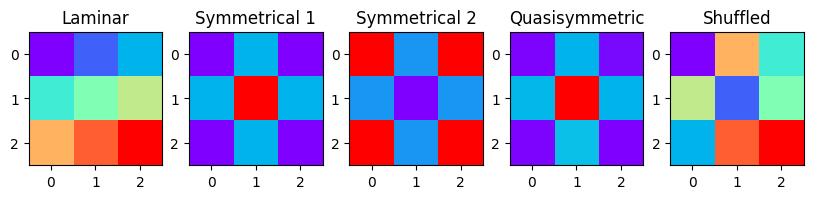

In [ ]:
plt.figure(figsize=(10,2))
plt.subplot(1,5,1)
plt.imshow(laminar, cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Laminar")

plt.subplot(1,5,2)
plt.imshow(symmetrical1, cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Symmetrical 1")

plt.subplot(1,5,3)
plt.imshow(symmetrical2, cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Symmetrical 2")

plt.subplot(1,5,4)
plt.imshow(quasiSymmetrical, cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Quasisymmetric")

plt.subplot(1,5,5)
plt.imshow(shuffled, cmap='rainbow')
plt.title("Shuffled")
plt.xticks([0,1,2])
plt.yticks([0,1,2])

plt.show()

The evaluation method GPA requires an Numpy vector of the type **float** as input. In the following code, we are converting the type of vector from **int** to **float**.

In [ ]:
laminar = laminar.astype(float)
symmetrical1 = symmetrical1.astype(float)
symmetrical2 = symmetrical2.astype(float) 
quasiSymmetrical = quasiSymmetrical.astype(float)
shuffled = shuffled.astype(float)

The method **\_\_cal\_\_()** is a special in Python objects, as it can simplify the notation of the most used method. 
This method has the following parameters:



*   ***mat*** - the input matrix (numpy array with elements of type float).
*   ***gx***,***gy*** - input vector lattice (numpy array with elements of type float).
*   ***moment*** - List of Gradient Moments ("G1","G1C","G2","G3", and "G4"). Default: "G2".
*   ***symmetrycalGrad*** - determines if the Gradient Moment will be measured on symmetrical part, asymmetrical part, or the full lattice ("S","A","F"). Default: "A".

If the ***mat*** variable is specified, then ***gx*** and ***gy*** will not be used. 





In [ ]:
ga(laminar, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.19526214587563495,
 'G1C': 0.7777777777777778,
 'G2': 0.4999999999999999,
 'G3': 0.7587841046115789,
 'G4': (1.879772282303151+1.6894873043266947j)}

In [ ]:
ga(symmetrical1, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.0, 'G1C': 0.0, 'G2': 0.0, 'G3': 0.0, 'G4': 0j}

In [ ]:
ga(symmetrical2, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.0, 'G1C': 0.0, 'G2': 0.0, 'G3': 0.0, 'G4': 0j}

In [ ]:
ga(quasiSymmetrical, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.2044965459699355,
 'G1C': 0.25,
 'G2': 0.4977858457773628,
 'G3': 0.25006112592517393,
 'G4': (1.090979818834745-0.04346464096261893j)}

In [ ]:
ga(shuffled, moment=["G1","G1C","G2","G3", "G4"])

{'G1': 0.3593262394264283,
 'G1C': 1.2222222222222223,
 'G2': 0.7959792163108705,
 'G3': 0.7744594584132449,
 'G4': (1.2240803352519527+0.9633961595810752j)}

## 2.1 Gradient Lattice Visualization

Several variables can be accessed from the object. In the following code, the gradient lattice is retrieved from the object.

In [ ]:
_ = ga(laminar)
gx,gy = ga.getDx(),ga.getDy()

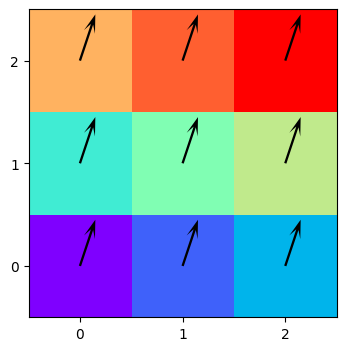

In [ ]:
plt.figure(figsize=(4,4))
plt.quiver(gx,gy,scale = 20,headwidth=5,headlength=8)
plt.imshow(laminar,origin='lower',cmap='rainbow')
#plt.xlim(-1,3)
#plt.ylim(-1,3)
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.show()

In [ ]:
_ = ga(laminar)
gxl,gyl = ga.getDx(),ga.getDy()
_ = ga(symmetrical1)
gxs1,gys1 = ga.getDx(),ga.getDy()
_ = ga(symmetrical2)
gxs2,gys2 = ga.getDx(),ga.getDy()
_ = ga(quasiSymmetrical)
gxqs,gyqs = ga.getDx(),ga.getDy()
_ = ga(shuffled)
gxsh,gysh = ga.getDx(),ga.getDy()

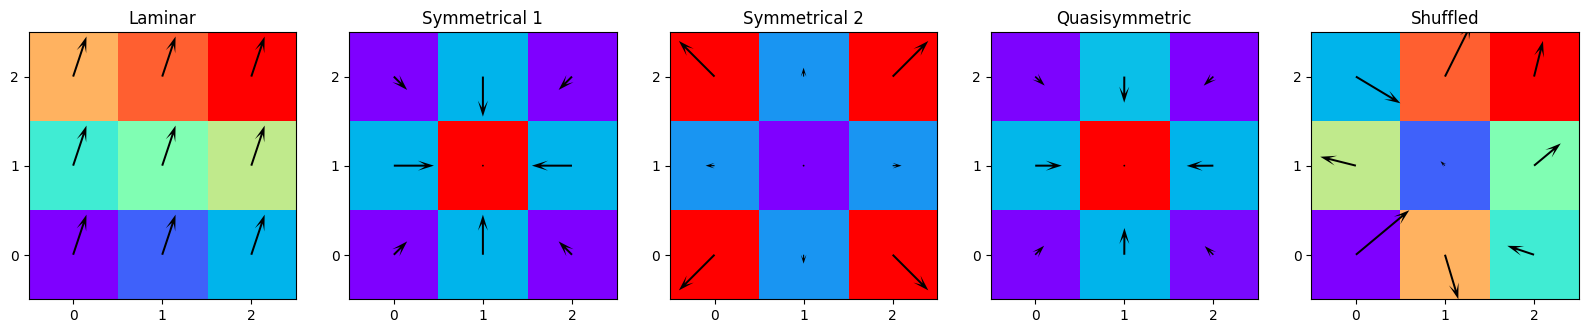

In [ ]:
plt.figure(figsize=(20,4))
plt.subplot(1,5,1)
plt.quiver(gxl,gyl,scale = 20,headwidth=5,headlength=8)
plt.imshow(laminar,origin='lower',cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Laminar")

plt.subplot(1,5,2)
plt.quiver(gxs1,gys1,scale = 20,headwidth=5,headlength=8)
plt.imshow(symmetrical1,origin='lower',cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Symmetrical 1")

plt.subplot(1,5,3)
plt.quiver(gxs2,gys2,scale = 30,headwidth=5,headlength=8)
plt.imshow(symmetrical2,origin='lower',cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Symmetrical 2")

plt.subplot(1,5,4)
plt.quiver(gxqs,gyqs,scale = 30,headwidth=5,headlength=8)
plt.imshow(quasiSymmetrical,origin='lower',cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Quasisymmetric")

plt.subplot(1,5,5)
plt.quiver(gxsh,gysh,scale = 30,headwidth=5,headlength=8)
plt.imshow(shuffled,origin='lower',cmap='rainbow')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
plt.title("Shuffled")

plt.show()

# 3. SLOAN + Galaxy Zoo 1 

## 3.1 Pre-processing

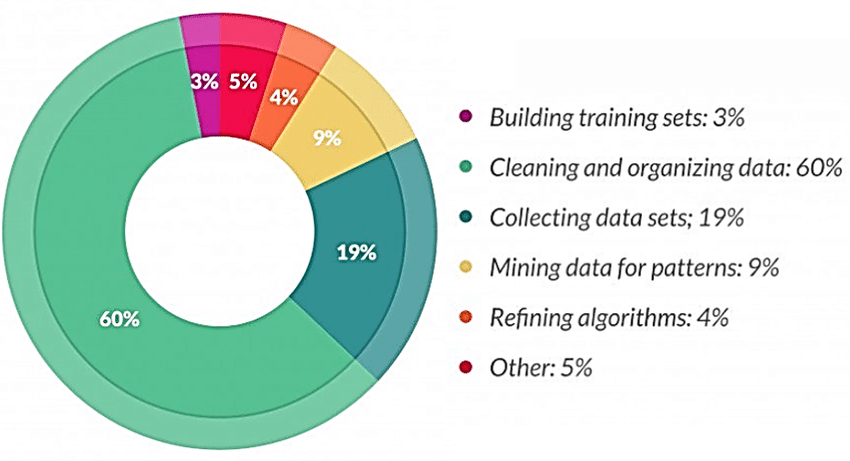

**Source:** [Sarih, et al.(2019)](https://www.researchgate.net/publication/335577003_Data_preparation_and_preprocessing_for_broadcast_systems_monitoring_in_PHM_framework)




To acquire the SDSS images, one can manually download [here]().
However, there is more simple solutions, such as the presented in the code bellow. The following script was adapted from [this](https://github.com/shilpakancharla/galaxy-image-classification) respository.

In [1]:
'''
Original code:
https://github.com/shilpakancharla/galaxy-image-classification
'''
import os
import ssl
import urllib.request
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import units as u

"""
    Get the right ascenscion (RA) and declination (DEC) degree values from the .csv file. We also drop
    the values for which the debiased values of either the elliptical galaxy probability or spiral 
    galaxy probability is less than 0.8.
    @param df: dataframe containing the degree coordinates
    @return dataframe containing the object ID, ra, and dec values from the .csv file with debiased
            values greater than 0.8 (we also keep the debiased probability columns)
"""
def drop_items(df):
    # Drop the values for which the debiased threshold is less than 0.8
    df = df[(df['P_EL_DEBIASED'] >= 0.8) | (df['P_CS_DEBIASED'] >= 0.8)]
    # Drop instances where 'UNCERTAIN' == 1 (only want elliptical and spiral from this dataset)
    df = df[(df['UNCERTAIN'] == 0)]
    
    # Now drop unecessary columns for gathering data
    df = df.drop(columns = ['NVOTE', 'P_EL', 'P_CW', 'P_ACW', 'P_EDGE', 'P_DK', 'P_MG', 
                            'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'UNCERTAIN'])
    
    # Results in dataframe of [NUMBER_GALAXIES rows x 5(ID, ra, dec, spiral, elliptical) columns]
    return df.reset_index(drop = True)
    
"""
    Convert the original right ascenscion (RA) and declination (DEC) values from the .csv file
    which are in degrees to decimal units.
    @param ra: right ascenscion (RA) degree
    @param dec: declination (DEC) degree
    @return celestial coordinate in decimal units
"""
def convert_to_dec(ra, dec):
    dec_coord = SkyCoord(ra = ra, dec = dec, unit = (u.hourangle, u.deg))
    coordinates = dec_coord.to_string('decimal').split(' ')
    ra = coordinates[0]
    dec = coordinates[1]
    return ra, dec
    

def get_images(df, folder=""):
    for idx,obj in df.iterrows():
        objid = obj["OBJID"]
        ra, dec =  convert_to_dec(obj["RA"],obj["DEC"])
        filename = folder+str(objid) + '.jpg'

        # Replace the ra and dec coordinates in the URL, downloading in 512 x 512 resolution
        try:
            image_url = "http://skyservice.pha.jhu.edu/DR7/ImgCutout/getjpeg.aspx?ra=" + str(ra) + "&dec=" + str(dec) + "&scale=0.15&width=512&height=512&opt="
            urllib.request.urlretrieve(image_url, filename) 
            # print("ObjID:", objid, "saved at:", filename)
        except:
            print("Image with object ID " + str(objid) + " and coordinates " + str(ra) + ", " + str(dec) + " not found.")
            print(image_url)
            continue
            
def download(gzooTable, nSp=1024, nEll=1024):
    ell = gzooTable[gzooTable["ELLIPTICAL"] == 1].sample(nEll)
    sp = gzooTable[gzooTable["SPIRAL"] == 1].sample(nSp)
    get_images(ell, "galaxies/elliptical/")
    get_images(sp, "galaxies/spiral/")
    

## 3.2 GPA

# 4. Extragalactic Radio Sources

